In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [63]:
df = pd.read_csv('/content/smartphone_cleaned_v5.csv')

In [64]:
df.shape

(980, 25)

In [65]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [67]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


# Univariate Analysis

In [68]:
# brand_name

<Axes: xlabel='brand_name'>

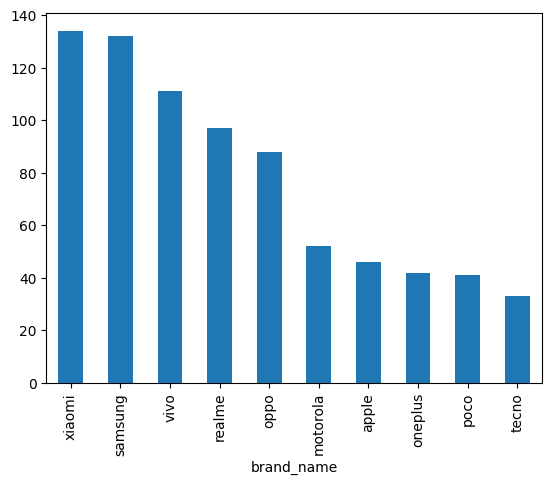

In [69]:
# plot a graph of top 10 brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

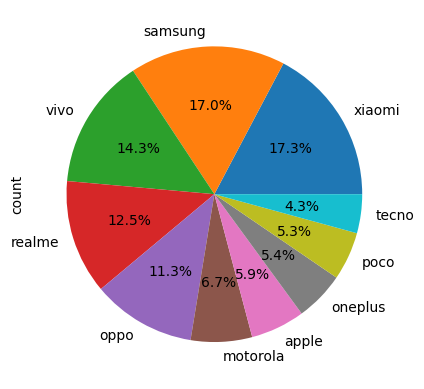

In [70]:
# pie chart
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [71]:
# no missing value in brand
df['brand_name'].isnull().sum()

0

In [72]:
# model
df['model'].nunique()

980

In [73]:
# price
df['price'].describe()

,price
count,980.000000
mean,32520.504082
std,39531.812669
min,3499.000000
25%,12999.000000
50%,19994.500000
75%,35491.500000
max,650000.000000


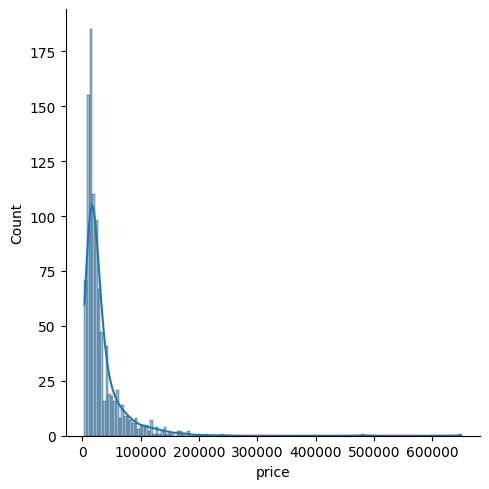

In [74]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [75]:
df['price'].skew()

6.591790999665567

<Axes: ylabel='price'>

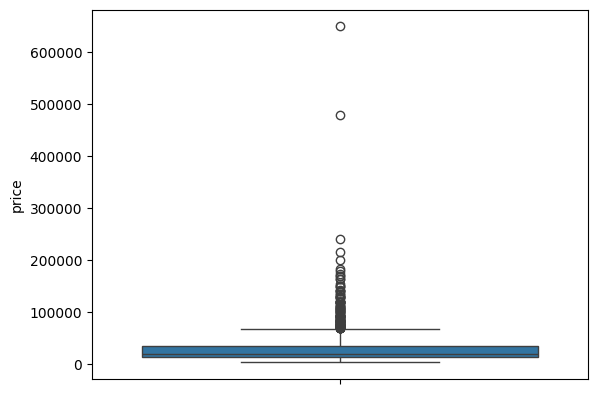

In [76]:
sns.boxplot(df['price'])

In [77]:
# Phone that's price is greater than 250000
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [78]:
# no missing value in price column
df['price'].isnull().sum()

0

# Conclusion
- The price column distribution is skewed
- There are outliers present in price column
- A lot of phone has lesser price value and a few of phone has high price.
- Some outlier values of phone will not considered for model training (As these phones price does not depend on their mobile specification. Their price is high because of gold and diamond plating. So these are purest form of outliers and we don't contains any column related to gold or diamond plating)

In [79]:
# rating

In [80]:
df['rating'].describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


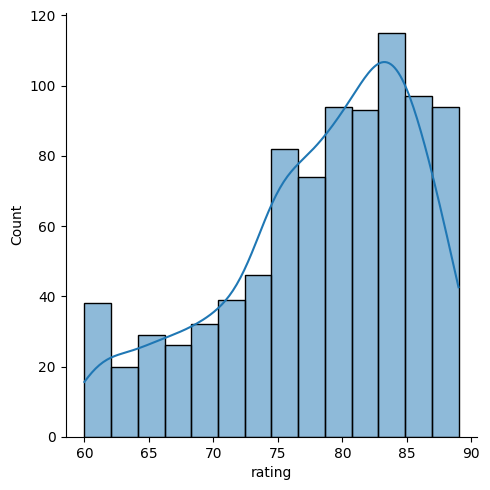

In [81]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [82]:
df['rating'].skew()

-0.6989993034105535

<Axes: ylabel='rating'>

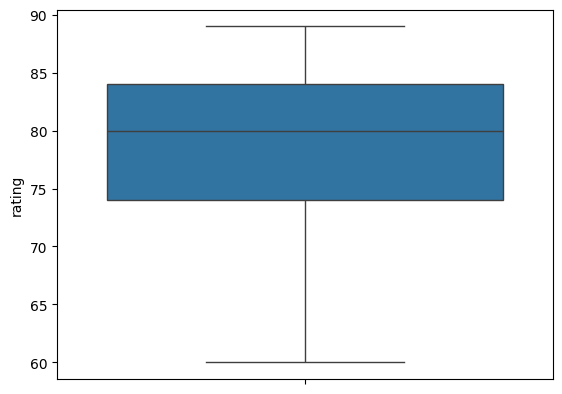

In [83]:
sns.boxplot(df['rating'])

In [84]:
# 10% missing value
df['rating'].isnull().sum()/980

0.10306122448979592

# Conclusion
- Data distribution is almost normal
- No outliers present
- There are some missing values here

In [85]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


<Axes: ylabel='count'>

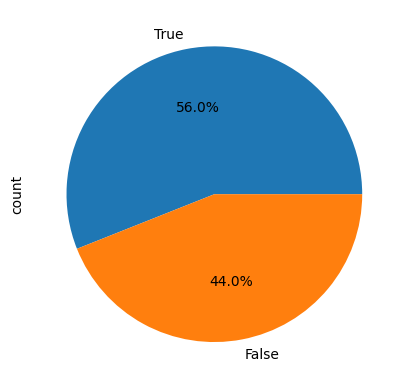

In [86]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

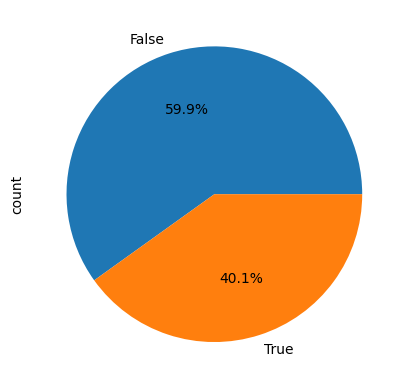

In [87]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

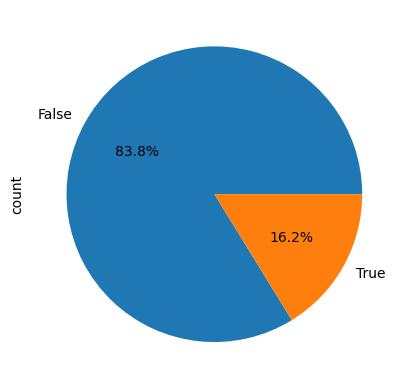

In [88]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [89]:
# Chinese phones have this ir_blaster feature
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

,count
brand_name,
xiaomi,109
poco,30
iqoo,6
huawei,6
vivo,4
redmi,2
honor,1
samsung,1


<Axes: ylabel='count'>

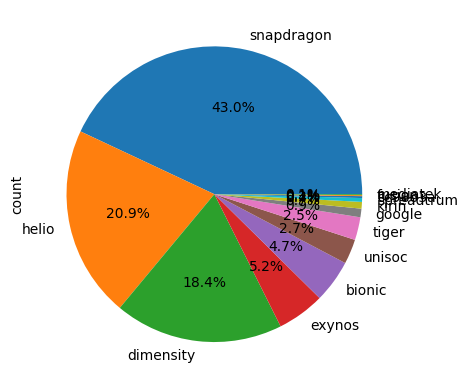

In [90]:
# processor_brand
df['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

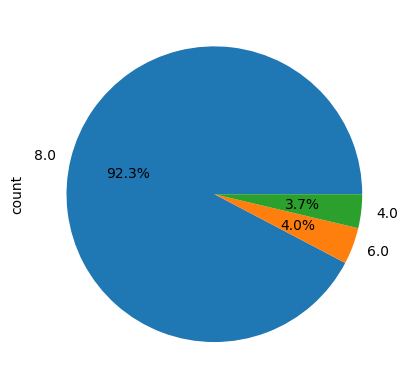

In [91]:
# num_cores
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# Conclusion
- This column will not much contribute to the model predictions

<Axes: ylabel='count'>

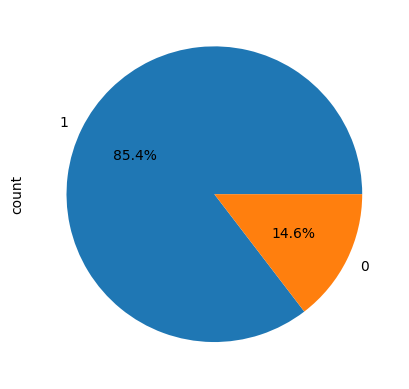

In [92]:
# fast_charging_available
df['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

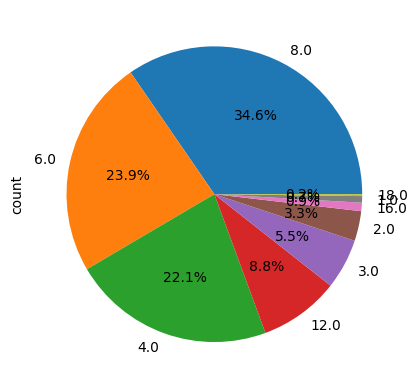

In [93]:
# ram_capacity
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

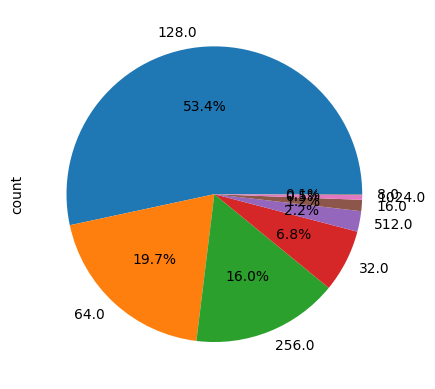

In [94]:
# internal_memory
df['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

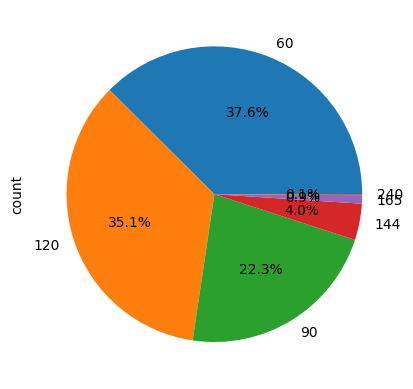

In [95]:
# refresh_rate
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [96]:
df['refresh_rate'].value_counts() # here is chance of one outlier value

,count
refresh_rate,
60,368
120,344
90,219
144,39
165,9
240,1


<Axes: ylabel='count'>

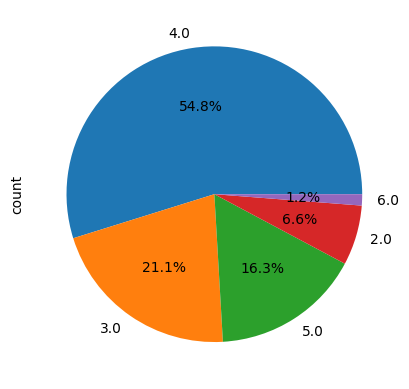

In [97]:
# Total no of cameras
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

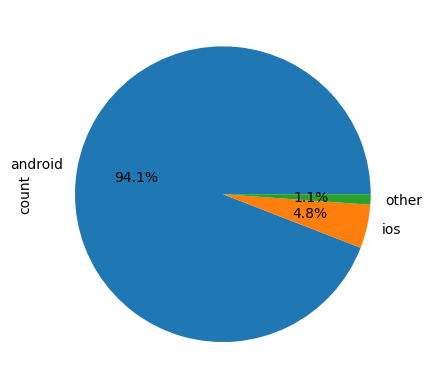

In [98]:
# Type of os
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

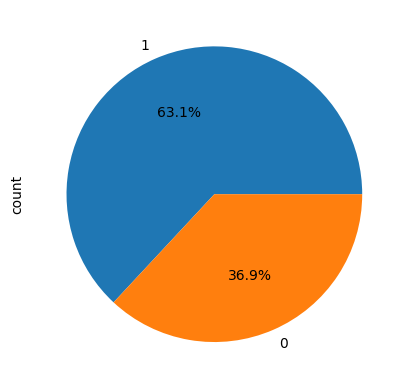

In [99]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

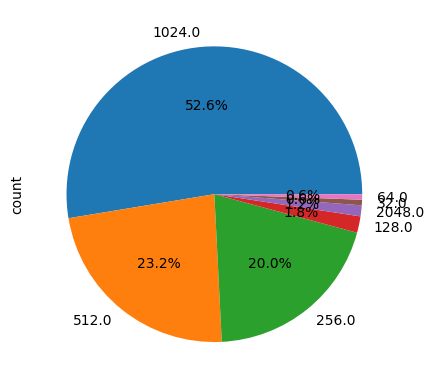

In [100]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [101]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [102]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

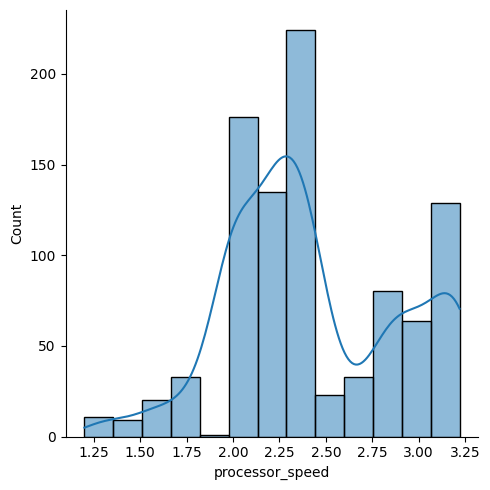

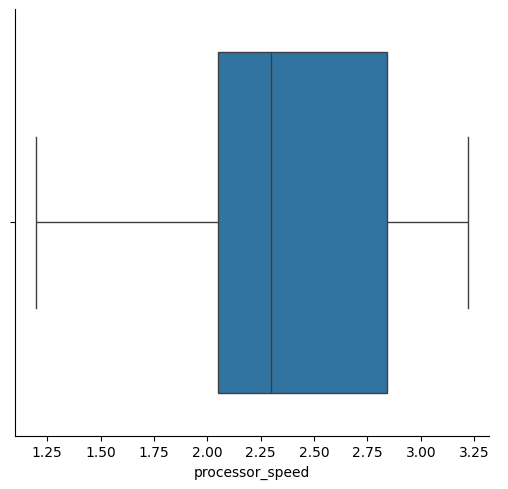

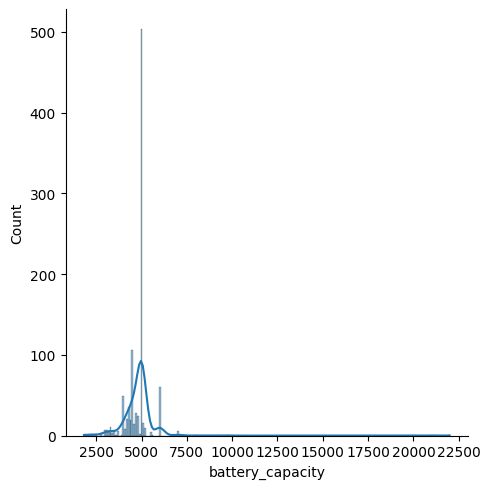

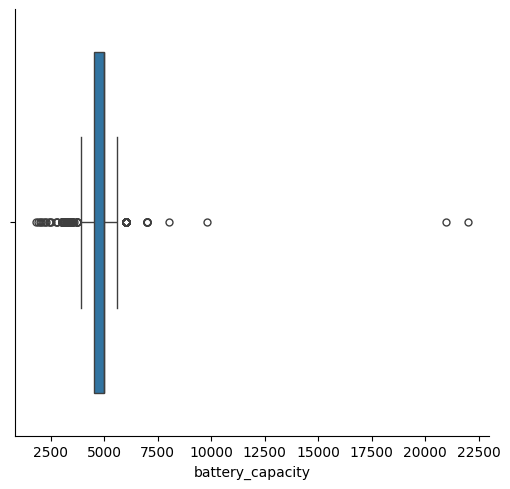

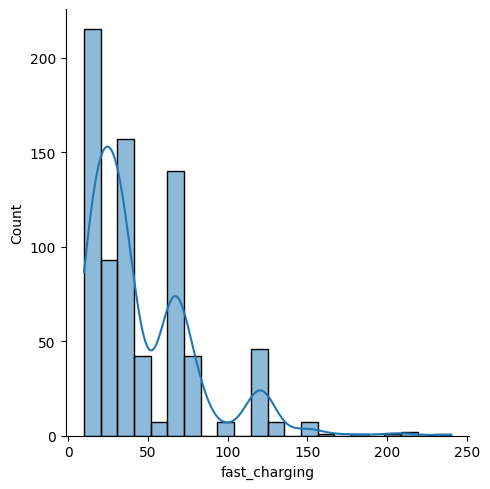

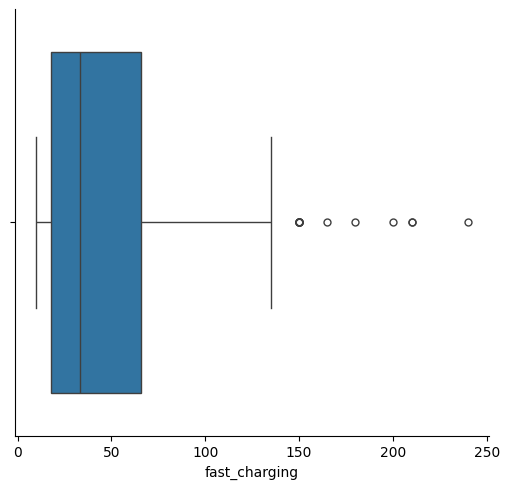

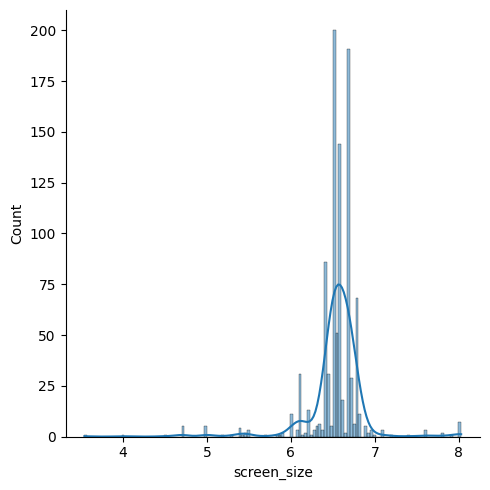

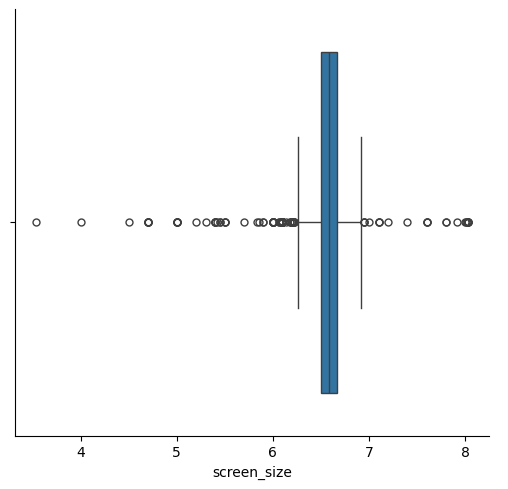

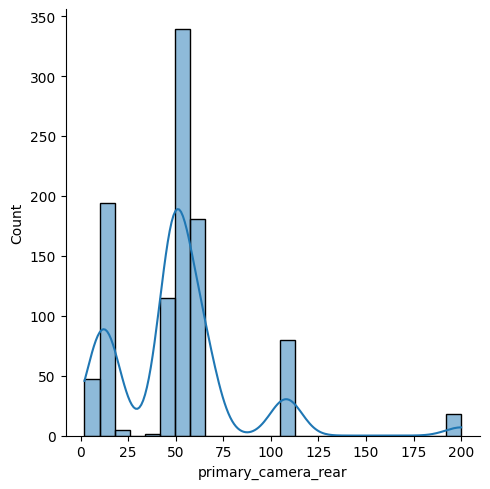

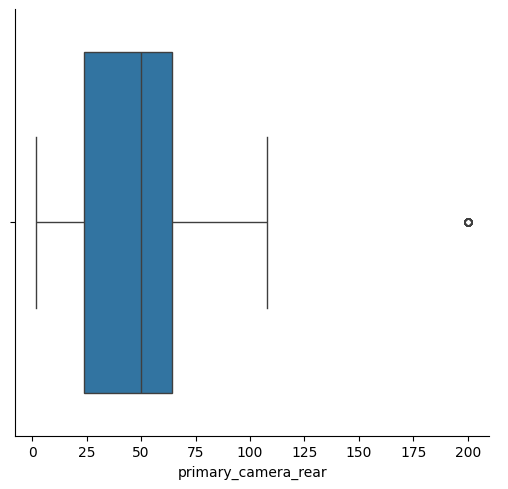

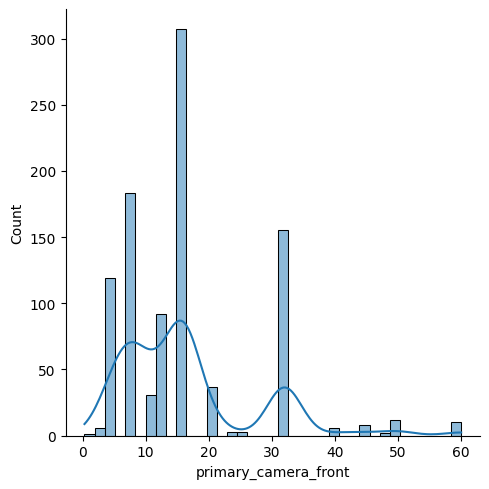

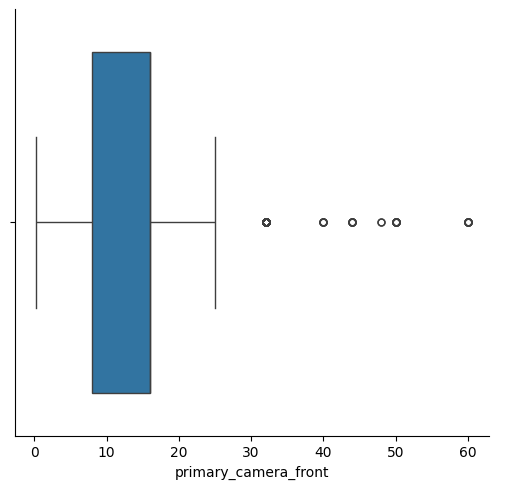

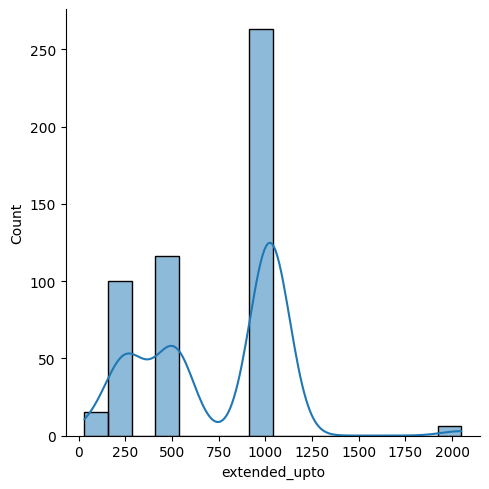

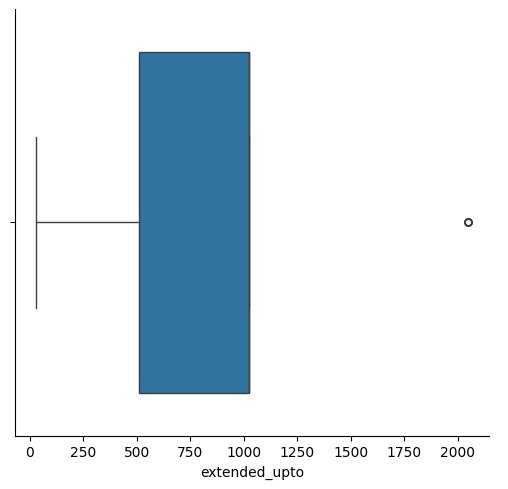

In [103]:
for col in num_columns:
  plot_graphs(col)

In [104]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


# Bivariate Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'royole'),
  Text(30, 0, 'so

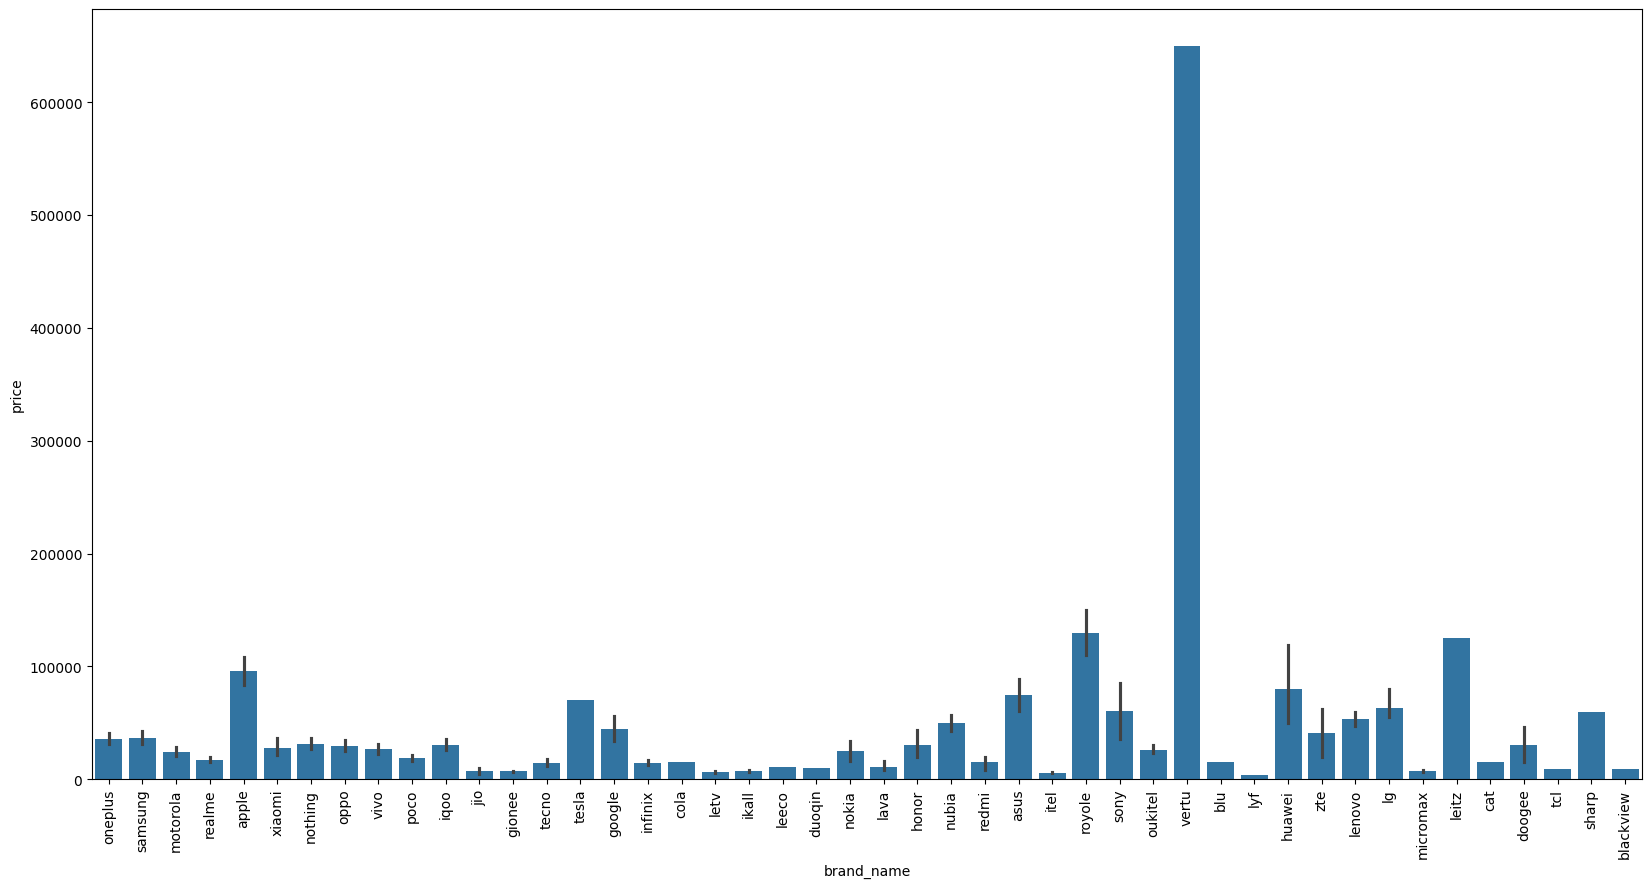

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [106]:
# Lets study those graphs which has more than 10 phones
x = df.groupby('brand_name').count()['model']

In [107]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

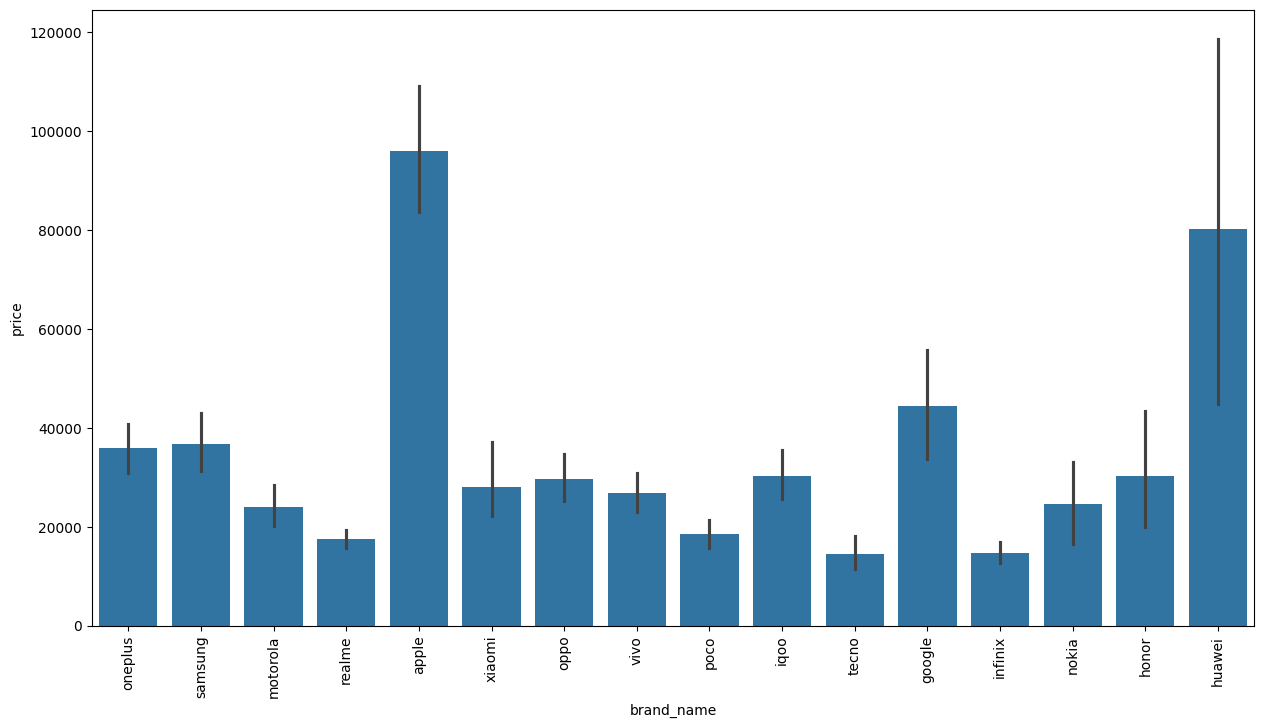

In [108]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

# Conclusion
- price is depending much on brand_name column

In [109]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


<Axes: xlabel='rating', ylabel='price'>

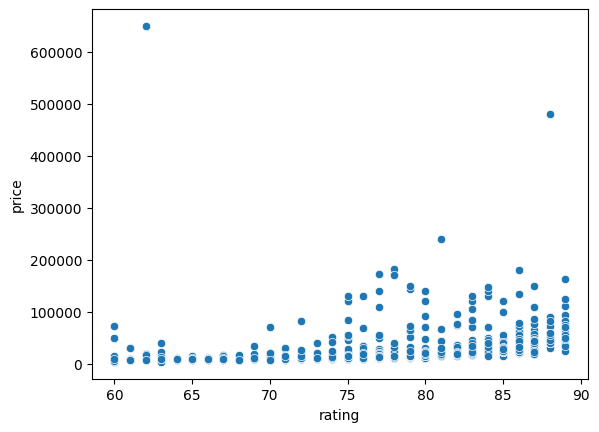

In [110]:
sns.scatterplot(data=df,x='rating',y='price')

# Conclusion
- price is not much depending on the rating column

<Axes: xlabel='has_5g', ylabel='price'>

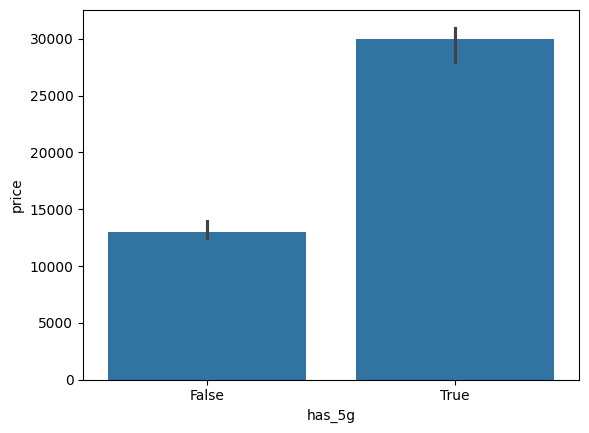

In [111]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

# Conclusion
- price is much depending on the 5G phone

<Axes: xlabel='has_nfc', ylabel='price'>

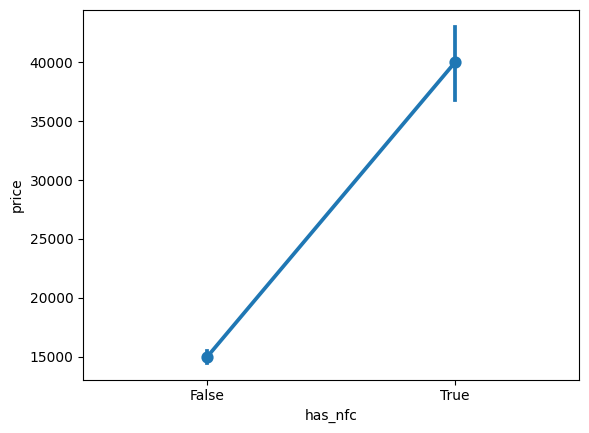

In [112]:
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

# Conclusion
- price is much depending on the nfc feature

<Axes: xlabel='has_ir_blaster', ylabel='price'>

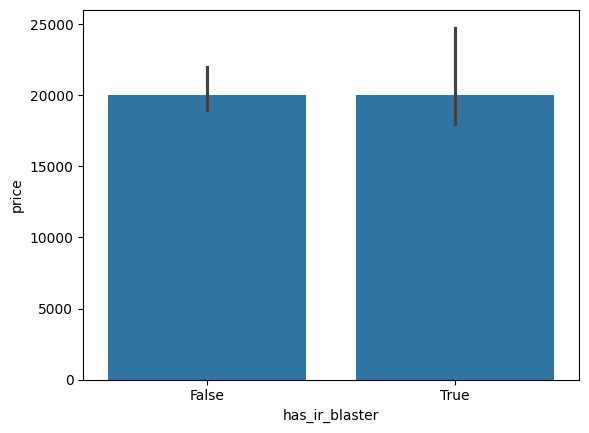

In [113]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

# Conclusion
- price is not affecting by IR blaster feature

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

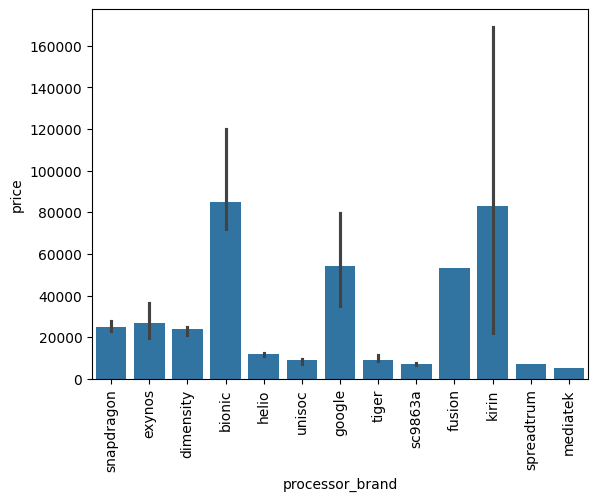

In [114]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

([0, 1, 2], [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

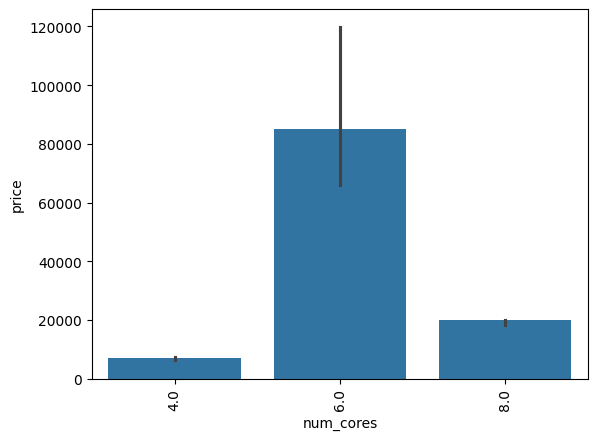

In [115]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [116]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


# Conclusion
- Apple phone generally have hexacores.
- Thatswhy 6 cores is showing very costly

<Axes: xlabel='processor_speed', ylabel='price'>

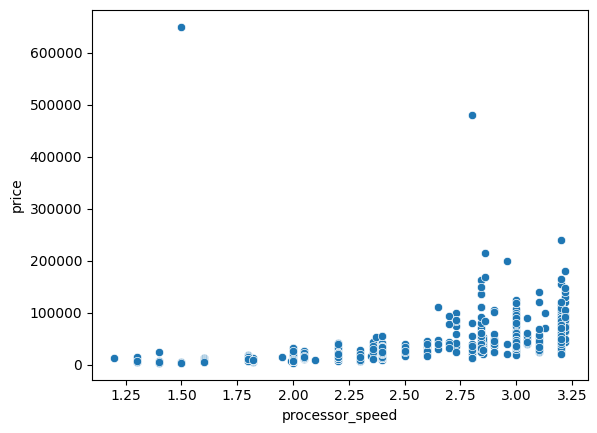

In [117]:
sns.scatterplot(data=df,x='processor_speed',y='price')

# Conclusion
- processor_speed or less costly phone is slow and fast for costly phone

<Axes: xlabel='screen_size', ylabel='price'>

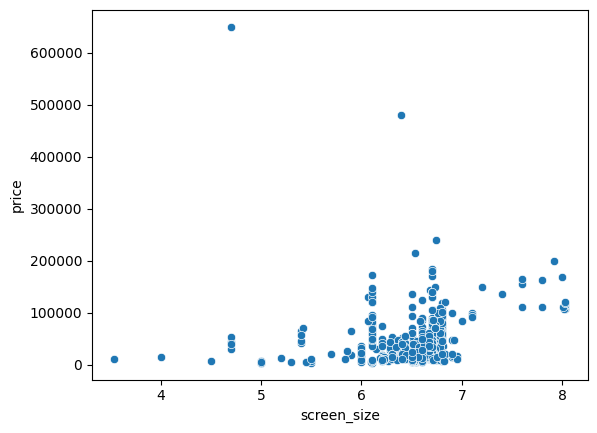

In [118]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [121]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,20
num_cores,6
processor_speed,42


In [ ]:
df.corr()['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

# Rating column is related to almost every column. So we are doing multivariate imputation and trying to fill all the missing value in rating column.

In [122]:
# knn imputer
df.shape

(980, 25)

In [123]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [124]:
from sklearn.impute import KNNImputer

In [125]:
imputer = KNNImputer(n_neighbors=5)

In [126]:
x_df_values = imputer.fit_transform(x_df)

In [127]:
# convert numpy array into a dataframe
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [130]:
x_df.isna().sum()

,0
rating,0
num_cores,0
processor_speed,0
battery_capacity,0
fast_charging_available,0
fast_charging,0
ram_capacity,0
internal_memory,0
screen_size,0
refresh_rate,0


In [128]:
x_df['price'] = df['price']

In [129]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [131]:
a = x_df.corr()['price'].reset_index()

In [132]:
b = df.corr()['price'].reset_index()

ValueError: could not convert string to float: 'oneplus'

In [ ]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


In [134]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


## One hot coding
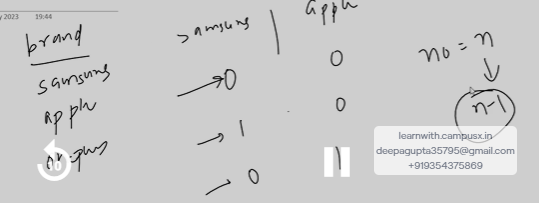

In [ ]:
# We can see correlation with categorical column now after one hot encoding
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

price                         1.000000
rating                        0.283504
has_5g                        0.305066
has_nfc                       0.470951
has_ir_blaster               -0.015807
num_cores                    -0.048561
processor_speed               0.474049
battery_capacity             -0.159232
fast_charging_available       0.116739
fast_charging                 0.277591
ram_capacity                  0.386002
internal_memory               0.557168
screen_size                   0.113253
refresh_rate                  0.244115
num_rear_cameras              0.125330
num_front_cameras             0.115228
primary_camera_rear           0.092095
primary_camera_front          0.162995
extended_memory_available    -0.448628
extended_upto                 0.091945
brand_name_asus               0.090566
brand_name_blackview         -0.019033
brand_name_blu               -0.014180
brand_name_cat               -0.014173
brand_name_cola              -0.014173
brand_name_doogee        